# Solar System Moon Analysis

Data Analysis carried out for over 200 moons across various planets in the solar system. Data imported include moon name, moon raduis and moon orbital period among others. Objective is to study the characteristics of moons according to their roman numeral designation.

In [1]:
#import the libraries we will use for this analysis
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# 1.Import our dataset

In [3]:
#Load our dataset from a html source
planetDF = pd.read_html("https://en.wikipedia.org/wiki/List_of_natural_satellites#List", match="Image", header=0)[0]

In [4]:
planetDF.head(10) #displaying first 10 rows

,Image,Parent,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17]
6,NaN,Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18]
8,NaN,Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia),[15][16][21]


In [13]:
planetDF[planetDF["Parent"]=="II (2)"]

,Image,Parent,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s)


# 2.Data Cleaning/validation

# a.Rename the columns

In [4]:
planetDF.rename(columns={"Parent":"Planet Name", "Numeral":"Roman Numeral", "Name":"Moon Name", "Mean radius (km)":"Moon mean radius (in km)", "Semi-major axis (km)":"Moon semi-major axis (in km)", "Sidereal period (d) (r = retrograde)":"Orbital period (in days)", "Ref(s)": "Reference(s)"}, inplace=True)
planetDF.head() #view renamed columns

,Image,Planet Name,Roman Numeral,Moon Name,Moon mean radius (in km),Moon semi-major axis (in km),Orbital period (in days),Discovery year,Discovered by,Notes,Reference(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17]


# b.Reorder the columns

In [5]:
planetDF = planetDF.reindex(["Planet Name", "Moon Name", "Roman Numeral", "Discovery year", "Discovered by", "Orbital period (in days)", "Moon mean radius (in km)", "Moon semi-major axis (in km)", "Notes", "Reference(s)", "Image"], axis=1)
planetDF.head() #view reordered columns

,Planet Name,Moon Name,Roman Numeral,Discovery year,Discovered by,Orbital period (in days),Moon mean radius (in km),Moon semi-major axis (in km),Notes,Reference(s),Image
0,Earth,Moon,I (1),Prehistoric,—,27.321582,1737.1,384399,Synchronous rotation,[13],NaN
1,Mars,Phobos,I (1),1877,Hall,0.319,11.1±0.15,9380,NaN,[14][15][16],NaN
2,Mars,Deimos,II (2),1877,Hall,1.262,6.2±0.18,23460,NaN,[14][15][16],NaN
3,Jupiter,Io,I (1),1610,Galileo,1.769,"1,818.1±0.1",421800,Main-group moon (Galilean),[16][17],NaN
4,Jupiter,Europa,II (2),1610,Galileo,3.551,1560.7±0.7,671100,Main-group moon (Galilean),[16][17],NaN


Planet Name is put first, as each planet may have multiple moons. Moon name is followed by roman numeral designation, as these two can be used to identify a partiular moon.

This is followed by the year of discovery and who discovered it. 

The numbers like orbital period, radius, semi-major axis then follow. Finally, any notes about the moon along with reference links are posted with Images.

# c.Set Index

In [6]:
#check if the index we are setting has any duplicates present
planetDF.duplicated(subset="Moon Name").sum() 

0

In [7]:
#setting Index as Moon name, as this can be used to identify each row uniquely
planetDF.set_index("Moon Name", drop=False, inplace=True) 
planetDF.head() #view index

,Planet Name,Moon Name,Roman Numeral,Discovery year,Discovered by,Orbital period (in days),Moon mean radius (in km),Moon semi-major axis (in km),Notes,Reference(s),Image
Moon Name,,,,,,,,,,,
Moon,Earth,Moon,I (1),Prehistoric,—,27.321582,1737.1,384399,Synchronous rotation,[13],NaN
Phobos,Mars,Phobos,I (1),1877,Hall,0.319,11.1±0.15,9380,NaN,[14][15][16],NaN
Deimos,Mars,Deimos,II (2),1877,Hall,1.262,6.2±0.18,23460,NaN,[14][15][16],NaN
Io,Jupiter,Io,I (1),1610,Galileo,1.769,"1,818.1±0.1",421800,Main-group moon (Galilean),[16][17],NaN
Europa,Jupiter,Europa,II (2),1610,Galileo,3.551,1560.7±0.7,671100,Main-group moon (Galilean),[16][17],NaN


# d.Clean columns

In [8]:
planetDF.isnull().sum() #check for null count in all columns

Planet Name                       0
Moon Name                         0
Roman Numeral                     0
Discovery year                    0
Discovered by                     0
Orbital period (in days)          0
Moon mean radius (in km)          0
Moon semi-major axis (in km)      0
Notes                             8
Reference(s)                      1
Image                           219
dtype: int64

In [9]:
#drop unwanted cols
planetDF.drop(["Image", "Reference(s)", "Notes"], axis=1, inplace=True) 

In [10]:
planetDF.head() #display our final dataframe

,Planet Name,Moon Name,Roman Numeral,Discovery year,Discovered by,Orbital period (in days),Moon mean radius (in km),Moon semi-major axis (in km)
Moon Name,,,,,,,,
Moon,Earth,Moon,I (1),Prehistoric,—,27.321582,1737.1,384399
Phobos,Mars,Phobos,I (1),1877,Hall,0.319,11.1±0.15,9380
Deimos,Mars,Deimos,II (2),1877,Hall,1.262,6.2±0.18,23460
Io,Jupiter,Io,I (1),1610,Galileo,1.769,"1,818.1±0.1",421800
Europa,Jupiter,Europa,II (2),1610,Galileo,3.551,1560.7±0.7,671100


1.Clean Roman Numeral column

In [11]:
planetDF["Roman Numeral"] = planetDF["Roman Numeral"].str.split().str[0]  #use first value of split string
planetDF["Roman Numeral"] = planetDF["Roman Numeral"].str.replace("—","Unassigned") #replace moons with no designated Roman Numeral
planetDF.head() #view cleaned column

,Planet Name,Moon Name,Roman Numeral,Discovery year,Discovered by,Orbital period (in days),Moon mean radius (in km),Moon semi-major axis (in km)
Moon Name,,,,,,,,
Moon,Earth,Moon,I,Prehistoric,—,27.321582,1737.1,384399
Phobos,Mars,Phobos,I,1877,Hall,0.319,11.1±0.15,9380
Deimos,Mars,Deimos,II,1877,Hall,1.262,6.2±0.18,23460
Io,Jupiter,Io,I,1610,Galileo,1.769,"1,818.1±0.1",421800
Europa,Jupiter,Europa,II,1610,Galileo,3.551,1560.7±0.7,671100


In [12]:
#check the data type of all rows of the column
planetDF["Roman Numeral"].apply(type).value_counts()

<class 'str'>    219
Name: Roman Numeral, dtype: int64

Split orbital period into itself and retrograde and clean both

In [13]:
#take second part of string as retrograde
planetDF["Retrograde"] = planetDF["Orbital period (in days)"].str.split().str[1] 
#take first part of string as orbital period
planetDF["Orbital period (in days)"] = planetDF["Orbital period (in days)"].str.split().str[0] 
planetDF.head() #view split columns

,Planet Name,Moon Name,Roman Numeral,Discovery year,Discovered by,Orbital period (in days),Moon mean radius (in km),Moon semi-major axis (in km),Retrograde
Moon Name,,,,,,,,,
Moon,Earth,Moon,I,Prehistoric,—,27.321582,1737.1,384399,NaN
Phobos,Mars,Phobos,I,1877,Hall,0.319,11.1±0.15,9380,NaN
Deimos,Mars,Deimos,II,1877,Hall,1.262,6.2±0.18,23460,NaN
Io,Jupiter,Io,I,1610,Galileo,1.769,"1,818.1±0.1",421800,NaN
Europa,Jupiter,Europa,II,1610,Galileo,3.551,1560.7±0.7,671100,NaN


In [14]:
planetDF.isnull().sum() #check null count in new column - Retrograde

Planet Name                      0
Moon Name                        0
Roman Numeral                    0
Discovery year                   0
Discovered by                    0
Orbital period (in days)         0
Moon mean radius (in km)         0
Moon semi-major axis (in km)     0
Retrograde                      98
dtype: int64

2.Clean Retrograde Column

In [15]:
planetDF["Retrograde"] = planetDF["Retrograde"].fillna(0) #fill 0 for null values

In [16]:
planetDF["Retrograde"].apply(type).value_counts() #heck the data type of all rows of the column

<class 'str'>    121
<class 'int'>     98
Name: Retrograde, dtype: int64

In [17]:
#replace string with value - 1 indicating presence of retrograde motoin: 
#that is the moon orbits in a direction opposite to their planets spin.
planetDF["Retrograde"] = planetDF["Retrograde"].replace(to_replace="(r)",value=1) 

In [18]:
planetDF["Retrograde"].apply(type).value_counts() #check the data type of all rows of the column

<class 'int'>    219
Name: Retrograde, dtype: int64

In [19]:
 #see unique values in col - 0: Moon has no retrograde motoin, 1: Moon has retrograde motoin
planetDF["Retrograde"].unique()

array([0, 1], dtype=int64)

3.Clean orbital period

In [20]:
planetDF["Orbital period (in days)"].apply(type).value_counts() #check the data type of all rows of the column

<class 'str'>    219
Name: Orbital period (in days), dtype: int64

In [21]:
#remove > and , characterts from string
planetDF["Orbital period (in days)"] = planetDF["Orbital period (in days)"].str.replace(">|,","")
planetDF["Orbital period (in days)"].head()

Moon Name
Moon      27.321582
Phobos        0.319
Deimos        1.262
Io            1.769
Europa        3.551
Name: Orbital period (in days), dtype: object

In [22]:
planetDF["Orbital period (in days)"] = planetDF["Orbital period (in days)"].astype(float) #convert to float

In [23]:
planetDF["Orbital period (in days)"].apply(type).value_counts()  #check the data type of all rows of the column

<class 'float'>    219
Name: Orbital period (in days), dtype: int64

# 3.What is the summary statistics of Orbital period for Moons according to their Roman Numeral Designations ?

In [24]:
#orbital period by roman numeral designation
planetDF.groupby(by="Roman Numeral")["Orbital period (in days)"].describe() 

,count,mean,std,min,25%,50%,75%,max
Roman Numeral,,,,,,,,
I,14.0,12.033756,13.620006,0.319,3.2635,6.132,14.94000,49.12
II,7.0,59.085043,133.071656,1.262,2.4605,4.144,21.56415,360.14
III,5.0,11.248600,15.469522,0.294,1.8880,7.155,8.70600,38.20
IV,5.0,13.073600,12.724282,0.311,2.7370,13.460,16.69000,32.17
IX,4.0,797.346000,789.311436,0.464,412.8485,654.605,1039.10250,1879.71
...,...,...,...,...,...,...,...,...
XXXIX,2.0,914.300000,246.667130,739.880,827.0900,914.300,1001.51000,1088.72
XXXV,2.0,311.577000,439.796376,0.594,156.0855,311.577,467.06850,622.56
XXXVI,2.0,932.930000,261.049681,748.340,840.6350,932.930,1025.22500,1117.52


# Do all of these Roman Numeral designations have moons with Retrograde motion ? If yes, how many do they have ?

In [25]:
#count of moons with retrograde motoin by Roman Numeral designation
planetDF.groupby(by="Roman Numeral")["Retrograde"].agg('sum')

Roman Numeral
I          1
II         0
III        0
IV         0
IX         3
          ..
XXXIX      2
XXXV       1
XXXVI      2
XXXVII     1
XXXVIII    2
Name: Retrograde, Length: 73, dtype: int64

# 4.Visualization of Analysis

In [26]:
#encode Roman Numeral for binning
planetDF["Roman Numeral"] = planetDF["Roman Numeral"].astype('category').cat.codes
planetDF.head() #view encoded column

,Planet Name,Moon Name,Roman Numeral,Discovery year,Discovered by,Orbital period (in days),Moon mean radius (in km),Moon semi-major axis (in km),Retrograde
Moon Name,,,,,,,,,
Moon,Earth,Moon,0,Prehistoric,—,27.321582,1737.1,384399,0
Phobos,Mars,Phobos,0,1877,Hall,0.319000,11.1±0.15,9380,0
Deimos,Mars,Deimos,1,1877,Hall,1.262000,6.2±0.18,23460,0
Io,Jupiter,Io,0,1610,Galileo,1.769000,"1,818.1±0.1",421800,0
Europa,Jupiter,Europa,1,1610,Galileo,3.551000,1560.7±0.7,671100,0


In [27]:
planetDF["Roman Numeral"].unique() #display unique values

array([ 0,  1,  2,  3, 29, 30, 31, 32,  4, 33, 34, 35, 36, 37, 49, 50, 51,
       52, 38, 53, 54, 55, 56, 57, 59, 60, 61, 62, 58, 63, 64, 65, 66, 67,
       69, 70, 71, 72, 68, 39, 40, 41, 42, 43, 45, 46, 47, 48, 44,  5,  6,
        7,  8,  9, 11, 12, 13, 14, 10, 15, 16, 17, 18, 19, 21, 22, 23, 24,
       20, 25, 26, 27, 28], dtype=int64)

In [28]:
planetDF["Roman Numeral"].describe() #observe summary statistics

count    219.000000
mean      33.059361
std       20.724296
min        0.000000
25%       20.500000
50%       31.000000
75%       50.000000
max       72.000000
Name: Roman Numeral, dtype: float64

In [29]:
#Bin these values
bins = np.linspace(start=-1, stop=72, num=5)
bins #view bin

array([-1.  , 17.25, 35.5 , 53.75, 72.  ])

In [30]:
planetDF["Roman Numeral Bin"] = pd.cut(planetDF["Roman Numeral"], bins) #cut and place values in bins
planetDF["Roman Numeral Bin"].head()

Moon Name
Moon      (-1.0, 17.25]
Phobos    (-1.0, 17.25]
Deimos    (-1.0, 17.25]
Io        (-1.0, 17.25]
Europa    (-1.0, 17.25]
Name: Roman Numeral Bin, dtype: category
Categories (4, interval[float64]): [(-1.0, 17.25] < (17.25, 35.5] < (35.5, 53.75] < (53.75, 72.0]]

In [31]:
#Descriptive Statistics on Orbital peirod by days by Binned Roman Numerals and Retrograde
planetDF.groupby(by=["Roman Numeral Bin","Retrograde"])["Orbital period (in days)"].describe()

count         mean          std      min  \
Roman Numeral Bin Retrograde                                             
(-1.0, 17.25]     0            35.0    68.756682   182.004333    0.294   
                  1            17.0   736.449235   357.759596    5.877   
(17.25, 35.5]     0            30.0   333.562433   798.889550    0.335   
                  1            46.0  1101.673913  1246.190000  250.400   
(35.5, 53.75]     0            18.0    84.753872   191.859654    0.295   
                  1            28.0  1306.050000  1632.994786  579.730   
(53.75, 72.0]     0            15.0   460.497933   521.121622    0.594   
                  1            30.0   830.395667   430.314051  266.560   

                                    25%       50%        75%      max  
Roman Numeral Bin Retrograde                                           
(-1.0, 17.25]     0             1.82850    7.1550    25.0355   887.48  
                  1           596.58000  723.2000   740.4300  1879.71  
(17.25, 35.5]     0             0.49425    2.0750   207.7525  3167.85  
                  1           720.55000  970.5850  1153.1425  9115.91  
(35.5, 53.75]     0             0.60475    0.7185     1.8880   686.95  
                  1           731.58000  828.7300  1290.6250  9373.99  
(53.75, 72.0]     0             0.96650  449.2200   853.0150  1687.01  
                  1           632.17500  728.9650   904.8150  2887.21

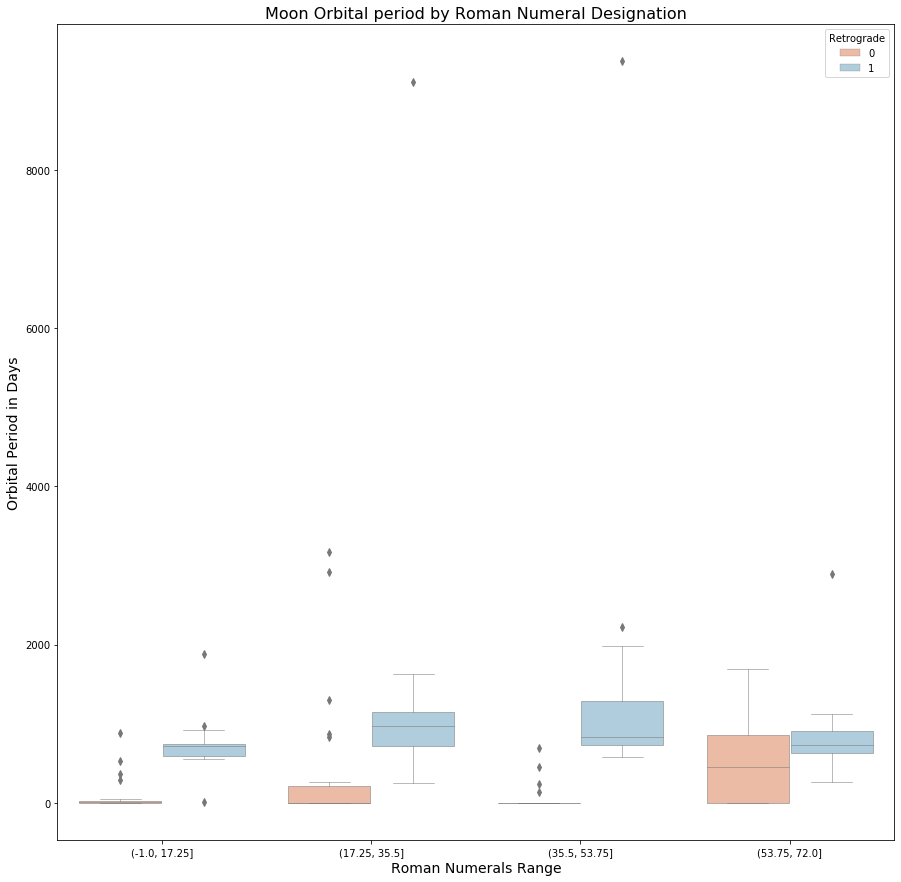

In [32]:
figure(figsize=(15, 15)) #set plot size

bplot = sns.boxplot(x=planetDF["Roman Numeral Bin"], y=planetDF["Orbital period (in days)"], hue=planetDF["Retrograde"], width=0.8,
                    palette="RdBu", orient="v", linewidth=0.5 )

bplot.axes.set_title("Moon Orbital period by Roman Numeral Designation", fontsize=16) #set title
bplot.set_xlabel("Roman Numerals Range", fontsize=14) #set x label
bplot.set_ylabel("Orbital Period in Days", fontsize=14) #set y label
bplot.tick_params(labelsize=10) #set label size


# Inference

1.The Roman Numeral designations between 1-17 have the highest number of moons without retrograde motion at 35 moons.

2.The Roman Numeral designations between 18-35 have the highest number of moons with retrograde motion at 46 moons.
The Roman Numeral designations between 18-35 also has the highest number of total moons (both with & without retrograde) at 76 and highest median orbital rotation with 970.58 days.

3.The highest mean orbital rotation of 1306.05 days, is for moons with Roman numeral designations 36-53. But they also have the highest standard deviation of 1632.99 days.                                                                                   This can be attributed to an outlier as seen in our box plot - a particular moon takes 9373.99 days for an orbital rotation around it's planet.

4.Another outlier is a particular moon taking 9115.91 days for an orbital rotation around it's planet.

Interestingly, both these outliers are for moons that have retrograde motion around it's respective planet. That is they orbit in a direction opposite to their planets spin.

